# Statistical Experiments and Inference

Design of experiments is a cornerstone of the practice of statistical, with applications in virtually all areas of research. The goal is to design an experiment in order to confirm or reject a hypothesis.

### Data for examples

In [1]:
getwd()

[1] "/home/galois/Documents/galois2024/Statistics-For-Data-Science"

In [2]:
data <- read.csv("data/UShealthInsurance/insurance.csv")

In [3]:
head(data,n=3)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.90,0,yes,southwest,16884.924
2,18,male,33.77,1,no,southeast,1725.552
3,28,male,33.00,3,no,southeast,4449.462


* **mbi** Body mass index, providing an understanding of body, weights that are relatively high or low relative to
* **sex** Insurance contractor gender, female / male
* **charges** Individual medical costs billed by health insurance.

## A/B testing
Is an experiment with two groups to establish which of two *treatments*, products, procedures, or the like is superior. Often one of the two tretments is the *standard existing treatment* (control), or no treatment. A typical hypothesis is that a *new treatment is better than the control*.

You know that any difference between the treatment groups is due to one two things:
* The effect of the different treatments
* Luck of the draw in which subject are assigned to which treatments.

Note: Why have a control group? Why just A/B? Why not C,D,...?

## Hypothesis test
Hypothesis tests (significance test): Their purpose is to help you learn whether *random chance* might be responsible for an observed effect and is futher analysis of an A/B test, or any randomized experiment. Statistical hypothesis testing was invented as a way to protect researchs from being fooled by random chance.

* **Null hypothesis**: Any difference between the groups is due chance.

Oru hope, is that we can in fact prove the null hypothesis is wrong and show that the output comes for groups A and B are *more different than what chance might produce*.

**Proof by contradiction:** If the null hypothesis is true, then A and B are similar. Therefore, when we apply *resampling methods* to the joint groups A and B and form two groups similar to A and B, there should not be a significant difference between them. Otherwise, the null hypothesis is incorrect. The question then arises: *how big must the difference be?*

## Resampling
*Resampling* in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. The are two main types:
* **bootstrap test**: used to assess the reliability of an estimate. 
* **permutation test**: used to test hypotheses. The procedure is:
    * combine the result ->
    * randonmly draw(without replacement) to collect one set of resamlpes that mirror the sizes of the original samples ->
    * calculated the *statistic or estimate* on it ->
    * record (one permutation) ->
    * build the distribution of the test statistic.

There are two variants of the poermutation test: *exhaustive permutation test* (exact test) which instead of just randomly shuffing and dividing the data, we actually figure aout all the possible ways it could be divided; *bootstrap èrmutation test* which used replacement instead of without replacement.

In [4]:
# funtion to permutations
perm_func <- function(nA,nB)
    {
    n <- nA+nB
    idx_a <- sample(1:n, nA)
    idx_b <- setdiff(1:n, idx_a)
    #mean_diff <- mean(x[idx_b])-mean(x[idx_a])
    return (list(a=idx_a, b=idx_b))
    }

## Statistical significance
*Statistical significance* is how statisticians masure whether an experiment (or even a study of existing data) yield a result more extreme than what change might produce. If the result is beyod the realm of change variation, it is said to be statistically significant.

Simply looking at the graph is not very precise way to measure statistical significance, so of more interest is the *p-value*.
* **p-value**: The p-value, or probability value, is a measure used in statistics to assess the evidence against a null hypothesis. This is the frequency with which the change model produce a result more extreme than the observed result. It represents the probability of observing the data or more extreme results if the null *hypothesis is true*.

1. A small p-value (typically **less than 0.05**) suggests that the observed data is unlikely to have occurred if the null hypothesis is true. In such cases, researchers may reject the null hypothesis in favor of the alternative hypothesis.
2. A large p-value (**greater than 0.05**) indicates that the observed data is not very unusual under the assumption of the null hypothesis. In this case, researchers may not have enough evidence to reject the null hypothesis.

Statisticians  frown on the practice of leaving it to research's discretion to determine wheteher a result is too unusual to happend by chance. Rather, a threshold is specified in advance, as in "more extreme than $5/%$ of the chance results"; this threshold is known as **alpha**. (p-value controversy, practical significance).

In assessing statistical significance, two error are possible:
* **Type 1**: mistakenly conclude an effect is real, when it is really just due to chance (the basic function of hypothesis test is minimize this type of error).
* **Type 2**: mistakenly conclude that an effect is not real (ie due to chance), when it actually is real.

> **Note**: For a data scientist, a p-value is a usefull  metric in situations where you want to know whether a model result that appears interesting and useful is within the range of nrmal chance variability.

### Example: Are the bmi in smokers higher than in non-smokers?

* **Null hypothesis**: there aren't difference between them. Their means are similar.

In [12]:
library(ggplot2)

In [13]:
column <- "bmi"

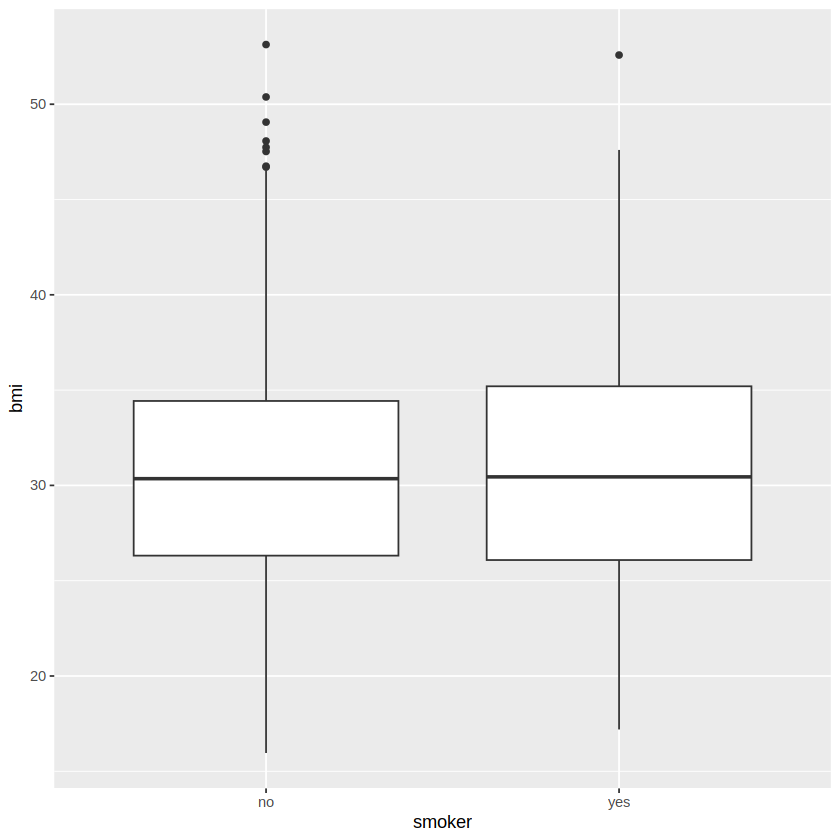

In [14]:
ggplot(data, aes(x=smoker, y=bmi)) + geom_boxplot()

In [15]:
mean_a = mean(data[data["smoker"]=="yes",column])
print(mean_a)
mean_b = mean(data[data["smoker"]=="no",column])
print(mean_b)
table(data$smoker)

[1] 30.70845
[1] 30.6518



  no  yes 
1064  274 

In [16]:
estimate <- rep(0,1000)
for (i in 1:1000){
    index <- perm_func(1064, 274)
    estimate[i] <- mean(data[index$a,column]) - mean(data[index$b,column])
}

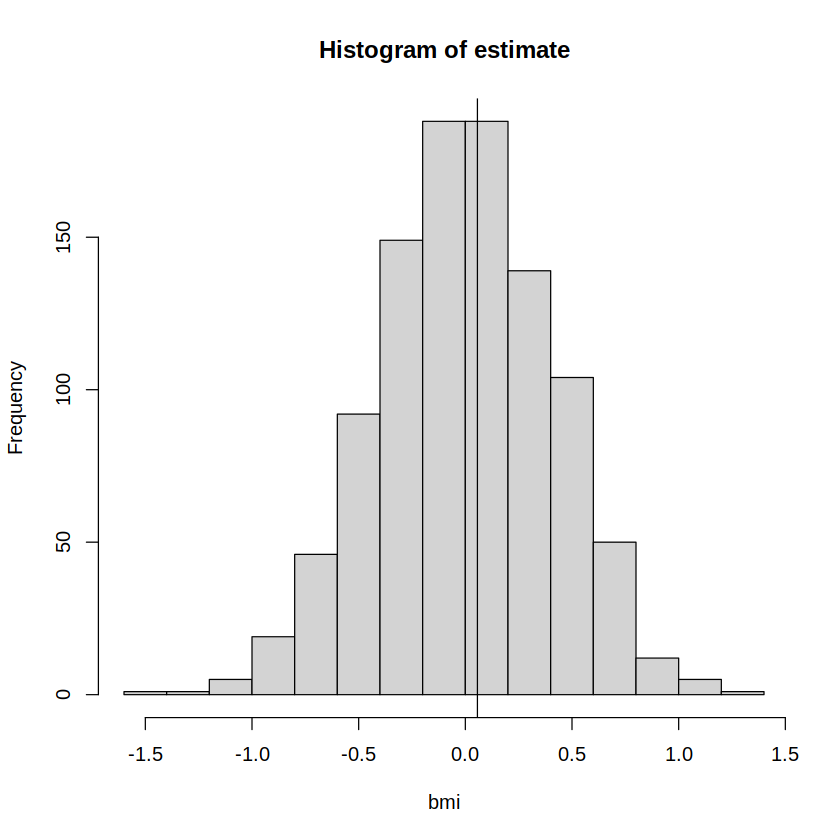

In [17]:
hist(estimate, xlab=column)
abline(v=mean_a-mean_b)

In [18]:
p_value <- mean( estimate > (mean_a-mean_b) )

In [19]:
p_value

[1] 0.448

We would expect to achieve a result as extreme as this, or more extreme result, by random chance over $\%40$ of the time. The observed data is not very unusual under the assumption of the null hypothesis

### Example: Are men more likely to smoke?

* **Null Hypothesis**: rate of male in each group is the same.

In [20]:
table(data[data$smoker=="yes","sex"]) # rate of male in smoker


female   male 
   115    159 

In [21]:
mean_s <- 159/(115+159)
mean_s

[1] 0.580292

In [22]:
table(data[data$smoker=="no","sex"]) # rate of male in no smoker


female   male 
   547    517 

In [23]:
mean_n <- 517/(517+547)
mean_n

[1] 0.4859023

In [24]:
estimate <- rep(0,1000)
for (i in 1:1000){
    index <- perm_func(115+159, 547+517) # smoker, no smoker
    estimate[i] <- mean(data[index$a,"sex"]=="male") - mean(data[index$b,"sex"]=="male")
}

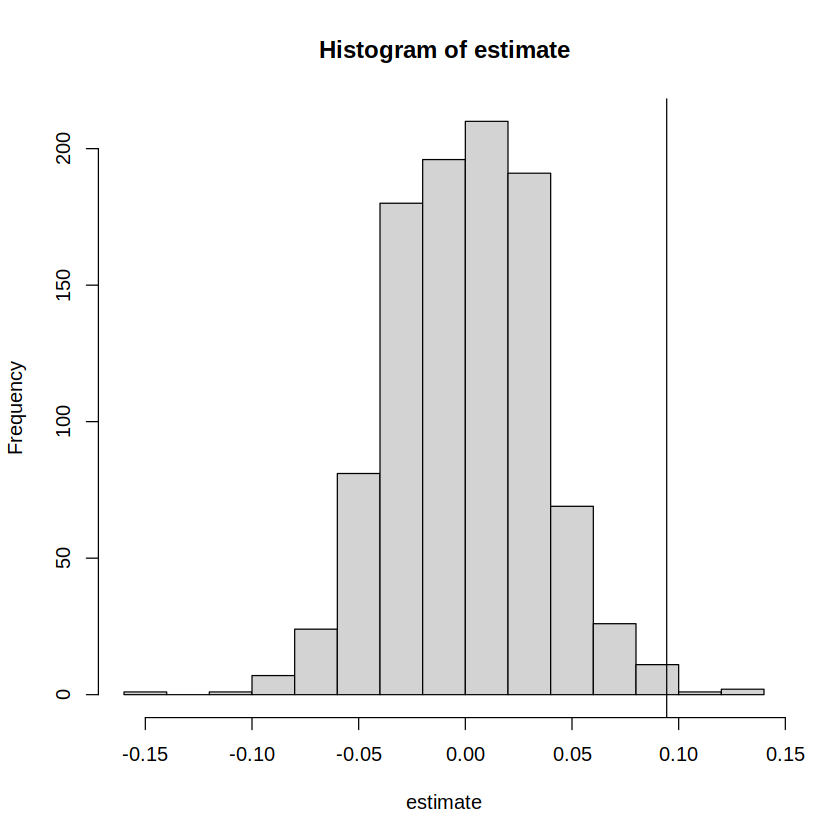

In [25]:
hist(estimate)
abline(v=mean_s-mean_n)

In [26]:
p_value <- mean( estimate > (mean_s-mean_n))
p_value

[1] 0.003

"If we assume that there is no difference between them, the observed data is unusual; we would observe that the difference in the proportion of men in both smokers and non-smokers groups, respectively, is equal to or greater than the observed difference in means only 0.2% of the time."

You might have evidence to reject the null hypothesis.

Since we have a binomial distribution, we can approximate the p-value with:

In [27]:
prop.test( x=c(159,517), n=c(115+159, 517+547) )


	2-sample test for equality of proportions with continuity correction

data:  c(159, 517) out of c(115 + 159, 517 + 547)
X-squared = 7.3929, df = 1, p-value = 0.006548
alternative hypothesis: two.sided
95 percent confidence interval:
 0.02639507 0.16238437
sample estimates:
   prop 1    prop 2 
0.5802920 0.4859023 


is close value to p-value obteined from the permutation test.

**Note**: Is possible use the <code>pro.test</code> function in the first example?

## t-test
Statisticians found that a good approximation to the permutation (shuffled) distribution was the t-test, based on **Gosset's t-distribution**. It is used for the very commin two-sample comparison -A/B test- in which the data is numeric. But in order for the t-distribution to be used without regard to scale, a **standardized form of the test statistic** must be used.

> **Note**: Statisticians need to navigate that world and learn its map, but data scientists do not.

In [ ]:
###############

## Multiple testing
If you look at the data through enough different perspectives and ask enough questions, you almost invariably will find a statistically significant effect. The more variables you add, or more models you run, the grreater the probability that something will emerge as significant just by chance. In supervised lerning tasks, a holdout is used to avoid this. In statistical and machine learning task not involving  a labebles holdout set, the risk of reaching conclusions based on statistical noise persists.

In statistics, there are some procedures to deal with this problem in very specific circunstances.
* Bonferroni adjusment
* Tukey's HSD

However, the problem of multiple comparisons goes beyond these highly structures cases (find something interesting in the data, including multiplicity issues) .

In any case, the adjusment procedure for highly defined and structured statistical test are too specific and inflexible to be of general use to data scientists. The botton line for data scientists on multiplicity is:
* use cross-validation and holdpout sample.
* for other procedures without a labeled holdout set to check the model, you must rely on: chance might play, resampling and simulation heuristics.

## Degree of Freedom
Number of values free to vary. The degree of freedom parameter, as applied to many probability distributions, affects the shape of the distribution and is an input to many statistical tests. Degrees of freedom is part of the standardization calculation  for statistical formulas and for large data size it rarely makes difference. 

> **Note**: There is one context in which is relevant: the use of **factorized variables** in regression (dummies).

## ANOVA
The statistical procedure that tests for  a statistically significant difference among the groups is called analysis of variance (ANOVA). Similar to A/B test we can use **resampling procedure** but in this case a single hypothesis test of the overall variance among multiple group means (**omnibus test**) is used: combine data -> shuffle and draw out resamples of the same size of groups -> record the means -> record the variance amongs the groups -> repeat.

What is the proportion of the time did the resampled variance exceed the observed variance? This is the **p-value**.

Just like t-test can be used instead of permutation test for comparing the mean of two groups there is a statistical test for ANOVA based on the F-statistic.

* **F-statistic** is based on the ratio of the variance across group means to the variance due to residual error. The higher this ratio, the more statistically significant the result.
* **Two-way ANOVA**

In [ ]:
#################

## Chi-Square test
Web testing often goes beyong A/B testing and tests **multiple treatments at once**. The chi-square test is used with count data to test how well it fits some expected distribution. The most common use of the chi-square statistic in statistical practice is with $r\times c$ contingency tables, to asssess whether the **null hypothesis of independence among variables is rasonable**.

#### Resampling approach:
* **Constitute a box** with 34 one (clicks) and 2966 zeros (no cliks).
* **Shuffle**, take three separate **samples** of 1000 and count the clicks in each.
* Find the **squared differences** between the shuffled counts and the expected counts and sum them. You can use *Pearson residual* $$R = \frac{Observed-Expected}{\sqrt{Expected}}$$ where expected is under null hypothesis assumption. The sum is the **chi-square statistic** $$X=\sum_i^r \sum_j^cR^2$$
* Repeat steps 2 and 3, say, 1000 times.
* How often does the resampled sum of queared deviations exceed the observed? That's the p-value.


The chi-squared distribution is a good aproximation of the shuffled resamlping test just described, except when counts are extemely low (sinlge digits, especially five or fewer). In such cases, the resampling procedure (**Ficher's exact**) will yield more accurate p-values. 

#### Statistical theory:
Asymptotic statstical theory shows that the **distribution of the chi-square statistic can be approximated by a chi-square distribution** (determined by the degrees of freedom). The futher out on the chi-square distribution the observed statistic is, the lower the p-value.

> **Note**: The chi-square test, or Fisher's exact test, is used when you want to know whether an effect is for real or might be the **product of chance**. One data science application of the chi-square test, especially Fisher's exact version, is in determinaning appropriate **sample size for web experiments**. Shi-square tests, or similar resampling simulations, are used in data science applications more as a filter to determine **whether an effect or feature is worthy** of futher consideration than as a formal test of significance. They are used in:
> * spatial statistics and mapping to determine whether  spatial data conforms to a specified null distribution.
> * automated feature selection, to assess class prevalence across features and identify features where the prevalence of a certain class is unusually hight or low, in a way that is not compatible with random variation.

## Multi-Arm Bandit Algorithm
Difficulties with traditional A/B test:
* Our answer may be inconclusive
* We might want to begin taking advantage of resutls that come in prior to the conclution of the experiment.
* We may want to right to xhange our minds or to try something different based on additional data that comes in after the experiment is over.

Multi-armed bandint: Your goal is to win as much money as possible and, more specically, to identify and settle on the winning arm sooner rather than later. The challenge is that you don't know at what overall rate the arm  pay out - you only know the result of individual pulls on the arms.

#### Epsilon-greedy algorithm for an A/B test:
* Generate a uniformly distributed random number between 0 and 1.
* If the number lies between 0 and epsilon(where epsilon is a number between 0 and 1, typically fairly samll), flip a fair coin (50/50 probability) and
    * if the coin is head, show offer A
    * if the coin is tails, show offer B
* If the number is $>\epsilon$, show whichever offer has had the hight response rate to date.

#### Thompson's sampling
Use a Bayesian approach: some prior distribution of reward is assumed initially, using what is called a *beta distribution*. As information accumulaes from each draw, this information can be update, allowing the selection of the next draw to be better optimizer as far as choosing the right arm.

## Power and Sample Size
If you run a web test, how do you decide how long it should run? There is not egenral guide - it depends, mainly, on the frequency with which the desired goal is attained.

**Power is the probability of detecting a specified effect size with specified sample characterisitcs (size and variability)**. 
For example, we might say that the probability of distinguishing between  a .330h hitter and .200 hitter in 25 at-bats is 0.75. The **effect size** is a difference of .130. And **detecting** means that a hypothesis test will reject the null hypothesis of "no difference" and conclude thare is a real effect. So the experiment of 25 at-abts ($n=25$) for two hitters, with an effect size of .130, has(hypothetical) **power** of $0.75$, or $75\%$.

Collecting data involves cost, alternative approach:
* Start with some hypothetical data that represents your best guess about the data that will result.
* Create a second sample simply adding the desired effect size to the first sample
* Draw a bootstrao samlpe of size n from each box
* Conduct a permutation hypothesis test on the two bootstrap samples and record whether the difference between them is statistically significant.
* Repead the preceding two steps many times and determine how often the difference was significant - that's the estimated power.

For calculating power or requiewd sample size, there are four moving parts:
* Sample size
* Effect size you want to detect
* Significance level (alpha) at which the test will be conducted
* Power

Specify any three of them, and the fourth can be calculated. Most commonly, you would want tio calculate **samples size**, so you must specifify the other three.
  

Books:
* Introductory statistics and analytics: A resamplng respective by Peter bruce
* Statistics by David freedman 4d
* The basic practice of statistics 8tf by David S.Moore
* BAndint algorithms for website optimizaition by John Myles Withe
* Sample size determination and power by Thomas Ryan